# week0_09: Once again, what is PyTorch?

It’s a Python-based scientific computing package targeted at two sets of audiences:

-  A replacement for NumPy to use the power of GPUs
-  a deep learning research platform that provides maximum flexibility and speed

Getting Started
---------------

**Tensors**

Tensors are similar to NumPy’s ndarrays, with the addition being that
Tensors can also be used on a GPU to accelerate computing.



_Credits: First two parts of this notebook are based on PyTorch official_ [tensor](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py) _and_ [autograd](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#sphx-glr-beginner-blitz-autograd-tutorial-py) _tutorials._

In [1]:
import torch

Construct a 5x3 matrix, uninitialized:



In [2]:
x = torch.empty(5, 3)
print(x)

tensor([[2.7518e+12, 7.5338e+28, 1.1703e-19],
        [7.2128e+22, 9.2216e+29, 7.5546e+31],
        [1.6932e+22, 3.0728e+32, 7.1429e+31],
        [6.2618e+22, 4.7428e+30, 7.1429e+31],
        [2.7518e+12, 7.5338e+28, 2.6071e+20]])


Construct a randomly initialized matrix:



In [3]:
x = torch.rand(5, 3)
print(x)

tensor([[0.0567, 0.0821, 0.5244],
        [0.5788, 0.9076, 0.7210],
        [0.8567, 0.3355, 0.1518],
        [0.6984, 0.2566, 0.3627],
        [0.9345, 0.5206, 0.9952]])


Construct a matrix filled zeros and of dtype long:



In [4]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


Construct a tensor directly from data:



In [5]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


or create a tensor based on an existing tensor. These methods
will reuse properties of the input tensor, e.g. dtype, unless
new values are provided by user



In [6]:
x = x.new_ones(5, 3, dtype=torch.double)  # new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype=torch.float)  # override dtype!
print(x)  # result has the same size

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 1.3135, -0.3603,  0.9607],
        [-0.6378,  0.5928,  0.1116],
        [ 1.1320,  0.1877,  0.7030],
        [ 0.1806,  2.2199,  0.3871],
        [ 0.3883,  0.6989, -0.8333]])


In [7]:
import numpy as np

In [8]:
a = np.random.randint((2, 5))

# Create a torch tensor from numpy tensor and cast it to float32 type
a_tensor = torch.tensor(a, dtype=torch.float)  # YOUR CODE HERE

assert a_tensor.dtype == torch.float32

Get its size:



In [9]:
print(x.size())

torch.Size([5, 3])


**Note:** ``torch.Size`` is in fact a tuple, so it supports all tuple operations.

In [10]:
isinstance(x.size(), tuple)

True

#### Operations

There are multiple syntaxes for operations. In the following
example, we will take a look at the addition operation.

Addition: syntax 1

In [11]:
y = torch.rand(5, 3)
print(x + y)

tensor([[ 1.8610,  0.1412,  1.3729],
        [-0.0305,  1.2887,  0.9303],
        [ 1.9316,  1.0050,  1.4970],
        [ 0.9762,  2.7134,  1.3030],
        [ 1.0380,  1.3573,  0.0792]])


Addition: syntax 2



In [12]:
print(torch.add(x, y))

tensor([[ 1.8610,  0.1412,  1.3729],
        [-0.0305,  1.2887,  0.9303],
        [ 1.9316,  1.0050,  1.4970],
        [ 0.9762,  2.7134,  1.3030],
        [ 1.0380,  1.3573,  0.0792]])


Addition: providing an output tensor as argument



In [13]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[ 1.8610,  0.1412,  1.3729],
        [-0.0305,  1.2887,  0.9303],
        [ 1.9316,  1.0050,  1.4970],
        [ 0.9762,  2.7134,  1.3030],
        [ 1.0380,  1.3573,  0.0792]])


Addition: in-place



In [14]:
# adds x to y
y.add_(x)
print(y)

tensor([[ 1.8610,  0.1412,  1.3729],
        [-0.0305,  1.2887,  0.9303],
        [ 1.9316,  1.0050,  1.4970],
        [ 0.9762,  2.7134,  1.3030],
        [ 1.0380,  1.3573,  0.0792]])


**Note**

Any operation that mutates a tensor in-place is post-fixed with an ``_``.\
For example: ``x.copy_(y)``, ``x.t_()``, will change ``x``.</p></div>

You can use standard NumPy-like indexing with all bells and whistles!

In [15]:
print(x[:, 1])

tensor([-0.3603,  0.5928,  0.1877,  2.2199,  0.6989])


Resizing: If you want to resize/reshape tensor, you can use ``torch.view``:



In [16]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


If you have a one element tensor, use ``.item()`` to get the value as a
Python number



In [17]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([0.2410])
0.24096013605594635


**Read later:**

100+ Tensor operations, including transposing, indexing, slicing,
mathematical operations, linear algebra, random numbers, etc.,
[are described here](http://pytorch.org/docs/torch)

## NumPy Bridge

Converting a Torch Tensor to a NumPy array and vice versa is a breeze.

The Torch Tensor and NumPy array will share their underlying memory
locations, and changing one will change the other.

#### Converting a Torch Tensor to a NumPy Array

In [18]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [19]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


See how the numpy array changed in value.



In [20]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


#### Converting NumPy Array to Torch Tensor

See how changing the np array changed the Torch Tensor automatically



In [21]:
a = np.ones(5)
b = torch.from_numpy(a)

np.add(a, 1, out=a)

print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


All the Tensors on the CPU except a CharTensor support converting to
NumPy and back.

## CUDA Tensors

Tensors can be moved onto any device using the ``.to`` method.

In [22]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")  # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)  # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))  # ``.to`` can also change dtype together!

tensor([1.2410], device='cuda:0')
tensor([1.2410], dtype=torch.float64)


In [23]:
torch.cuda.get_device_name(0)

'GeForce RTX 2060'

# Autograd: Automatic Differentiation

Central to all neural networks in PyTorch is the ``autograd`` package.
Let’s first briefly visit this, and we will then go to training our
first neural network.


The ``autograd`` package provides automatic differentiation for all operations
on Tensors. It is a define-by-run framework, which means that your backprop is
defined by how your code is run, and that every single iteration can be
different.

Let us see this in more simple terms with some examples.

## Tensor

``torch.Tensor`` is the central class of the package. If you set its attribute
``.requires_grad`` as ``True``, it starts to track all operations on it. When
you finish your computation you can call ``.backward()`` and have all the
gradients computed automatically. The gradient for this tensor will be
accumulated into ``.grad`` attribute.

To stop a tensor from tracking history, you can call ``.detach()`` to detach
it from the computation history, and to prevent future computation from being
tracked.

To prevent tracking history (and using memory), you can also wrap the code block
in ``with torch.no_grad():``. This can be particularly helpful when evaluating a
model because the model may have trainable parameters with `requires_grad=True`,
but for which we don't need the gradients.

There’s one more class which is very important for autograd
implementation - a ``Function``.

``Tensor`` and ``Function`` are interconnected and build up an acyclic
graph, that encodes a complete history of computation. Each tensor has
a ``.grad_fn`` attribute that references a ``Function`` that has created
the ``Tensor`` (except for Tensors created by the user - their
``grad_fn is None``).

If you want to compute the derivatives, you can call ``.backward()`` on
a ``Tensor``. If ``Tensor`` is a scalar (i.e. it holds a one element
data), you don’t need to specify any arguments to ``backward()``,
however if it has more elements, you need to specify a ``gradient``
argument that is a tensor of matching shape.



Create a tensor and set requires_grad=True to track computation with it



In [24]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


Do an operation of tensor:



In [25]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


``y`` was created as a result of an operation, so it has a ``grad_fn``.



In [26]:
print(y.grad_fn)

Do more operations on y

In [27]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


``.requires_grad_( ... )`` changes an existing Tensor's ``requires_grad``
flag in-place. The input flag defaults to ``False`` if not given.



In [28]:
a = torch.randn(2, 2)
a = (a * 3) / (a - 1)
print(a.requires_grad)

a.requires_grad_(True)
print(a.requires_grad)

b = (a * a).sum()
print(b.grad_fn)

False
True


Gradients
---------
Let's backprop now
Because ``out`` contains a single scalar, ``out.backward()`` is
equivalent to ``out.backward(torch.tensor(1))``.



In [29]:
out.backward()

print gradients d(out)/dx




In [30]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


You should have got a matrix of ``4.5``. Let’s call the ``out``
*Tensor* “$o$”.
We have that 
$$o = \frac{1}{4}\sum_i z_i,$$

$$z_i = 3(x_i+2)^2$$ and $$z_i\bigr\rvert_{x_i=1} = 27$$

Therefore,

$$\frac{\partial o}{\partial x_i} = \frac{3}{2}(x_i+2),$$ hence
$$\frac{\partial o}{\partial x_i}\bigr\rvert_{x_i=1} = \frac{9}{2} = 4.5$$

You can do many crazy things with autograd!



In [31]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([ 760.1940,  385.7352, -601.2919], grad_fn=<MulBackward0>)


In [32]:
gradients = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(gradients)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


You can also stop autograd from tracking history on Tensors
with ``.requires_grad=True`` by wrapping the code block in
``with torch.no_grad()``:



In [33]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


**Read Later:**

* Documentation of ``autograd`` and ``Function`` is at http://pytorch.org/docs/autograd
* Methods to visualize graph: [Netron](https://github.com/lutzroeder/Netron), [hiddenlayer](https://github.com/waleedka/hiddenlayer), [pytorchviz](https://github.com/szagoruyko/pytorchviz)


### Dealing with the familiar task
Now we will tackle the same car classification problem with new techniques: neural networks. Let's get started

In [34]:
import pandas as pd

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


try:
    dataset = pd.read_csv(
        "../assignments/assignment_Midterm/car_data.csv", delimiter=",", header=None
    ).values
except FileNotFoundError:
    !wget https://raw.githubusercontent.com/neychev/harbour_ml2020/master/assignments/assignment_Midterm/car_data.csv
    dataset = pd.read_csv("car_data.csv", delimiter=",", header=None).values

--2021-03-30 16:51:17--  https://raw.githubusercontent.com/neychev/harbour_ml2020/master/assignments/assignment_Midterm/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv.2’

car_data.csv.2      100%[===================>]  57,01K  --.-KB/s    in 0,02s   

2021-03-30 16:51:17 (2,26 MB/s) - ‘car_data.csv.2’ saved [58374/58374]



In [36]:
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train_raw, y_test_raw = train_test_split(data, target, test_size=0.15)
print(X_train.shape, y_train_raw.shape, X_test.shape, y_test_raw.shape)

(846, 19) (846,)
(719, 19) (719,) (127, 19) (127,)


Now we need to map all the class labels to numbers. PyTorch does not like non-numeric labels.

In [37]:
mapper = {x: idx for idx, x in enumerate(np.unique(y_train_raw))}
y_train = np.array([mapper[y] for y in y_train_raw])
y_test = np.array([mapper[y] for y in y_test_raw])

In [38]:
# YOUR CODE HERE

And let's preprocess the feature matrices as well

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train.astype(float))

X_train_scaled = scaler.transform(X_train.astype(float))
X_test_scaled = scaler.transform(X_test.astype(float))

In [40]:
dataset

array([[0, 95, 48, ..., 187, 197, 'van'],
       [1, 91, 41, ..., 189, 199, 'van'],
       [2, 104, 50, ..., 188, 196, 'saab'],
       ...,
       [843, 106, 54, ..., 187, 201, 'saab'],
       [844, 86, 36, ..., 190, 195, 'saab'],
       [845, 85, 36, ..., 186, 190, 'van']], dtype=object)

In [41]:
import torch
import torchsummary
from torch import nn
from torch.nn import functional as F

Here comes your first model, simple multiclass logistic regression (almost the same one you have used yesterday, but with no regularization)

In [42]:
model = nn.Sequential()
model.add_module("l1", nn.Linear(19, 32))
model.add_module("a1", nn.Tanh())
model.add_module("l2", nn.Linear(32, 32))
model.add_module("a2", nn.Tanh())
model.add_module("d1", nn.Dropout())
model.add_module("l3", nn.Linear(32, 4))

In [43]:
model = nn.Sequential()
model.add_module("l1", nn.Linear(19, 4))
model.add_module("a1", nn.LogSoftmax(dim=1))
model.to('cuda')

Sequential(
  (l1): Linear(in_features=19, out_features=4, bias=True)
  (a1): LogSoftmax(dim=1)
)

In [44]:
torchsummary.summary(model, (19,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 4]              80
        LogSoftmax-2                    [-1, 4]               0
Total params: 80
Trainable params: 80
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


We define the optimizer (it's named Adam, we will discuss it tomorrow. You can treat it as SGD with some bells and whistles)

In [45]:
opt = torch.optim.Adam(model.parameters())

And here comes the loss function as well. `nn.CrossEntropyLoss` combines both log-softmax and 

In [46]:
loss_function = nn.NLLLoss()

In [47]:
X_train_torch = torch.tensor(X_train_scaled, dtype=torch.float32).to('cuda')
X_test_torch = torch.tensor(X_test_scaled, dtype=torch.float32).to('cuda')

y_train_torch = torch.tensor(y_train, dtype=torch.long).to('cuda')
y_test_torch = torch.tensor(y_test, dtype=torch.long).to('cuda')

In [48]:
# example loss
loss_function(model(X_train_torch[:3]), y_train_torch[:3])

tensor(1.7105, device='cuda:0', grad_fn=<NllLossBackward>)

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
history = []

for i in range(1000):
    # sample 128 random observations
    ix = np.random.randint(0, len(X_train), 256)
    x_batch = X_train_torch[ix]
    y_batch = y_train_torch[ix]

    # predict probabilities
    probs = model(x_batch)
    
    # compute loss, just like before
    loss = loss_function(probs, y_batch)

    # compute gradients
    loss.backward()

    # Adam step
    opt.step()
    
    # clear gradients
    model.zero_grad()

    history.append(loss.item())

    if i % 50 == 0:
        print(
            "step #{} | mean loss = {:.5}, test accuracy = {:.5}".format(
                i,
                np.mean(history[-10:]),
                accuracy_score(y_test, model(X_test_torch).cpu().detach().numpy().argmax(axis=1)),
            )
        )

step #0 | mean loss = 1.3621, test accuracy = 0.23622
step #50 | mean loss = 1.2165, test accuracy = 0.3622
step #100 | mean loss = 1.1322, test accuracy = 0.45669
step #150 | mean loss = 1.0779, test accuracy = 0.53543
step #200 | mean loss = 1.0399, test accuracy = 0.6063
step #250 | mean loss = 0.97981, test accuracy = 0.6378
step #300 | mean loss = 0.96967, test accuracy = 0.66929
step #350 | mean loss = 0.92902, test accuracy = 0.68504
step #400 | mean loss = 0.90946, test accuracy = 0.70079
step #450 | mean loss = 0.86854, test accuracy = 0.68504
step #500 | mean loss = 0.85616, test accuracy = 0.69291
step #550 | mean loss = 0.82334, test accuracy = 0.72441
step #600 | mean loss = 0.81348, test accuracy = 0.73228
step #650 | mean loss = 0.78604, test accuracy = 0.73228
step #700 | mean loss = 0.7749, test accuracy = 0.73228
step #750 | mean loss = 0.76202, test accuracy = 0.73228
step #800 | mean loss = 0.74232, test accuracy = 0.73228
step #850 | mean loss = 0.73322, test accur

Now we get the predictions

In [52]:
y_predicted_train = model(torch.from_numpy(X_train_scaled).type(torch.float32).to('cuda')).detach().cpu().numpy()
y_predicted_test = model(torch.from_numpy(X_test_scaled).type(torch.float32).to('cuda')).detach().cpu().numpy()

In [54]:
import scikitplot
from sklearn.metrics import accuracy_score, f1_score

In [55]:
print(
    "Accuracy train: {}\nAccuracy  test: {}\nf1 train: {}\nf1 test: {}".format(
        accuracy_score(y_train, np.argmax(y_predicted_train, axis=1)),
        accuracy_score(y_test, np.argmax(y_predicted_test, axis=1)),
        f1_score(y_train, np.argmax(y_predicted_train, axis=1), average="macro"),
        f1_score(y_test, np.argmax(y_predicted_test, axis=1), average="macro"),
    )
)

Accuracy train: 0.7621696801112656
Accuracy  test: 0.7401574803149606
f1 train: 0.7532427144753857
f1 test: 0.7280900527021319


In [56]:
print(
    "Accuracy train: {}\nAccuracy  test: {}\nf1 train: {}\nf1 test: {}".format(
        accuracy_score(y_train, np.argmax(y_predicted_train, axis=1)),
        accuracy_score(y_test, np.argmax(y_predicted_test, axis=1)),
        f1_score(y_train, np.argmax(y_predicted_train, axis=1), average="weighted"),
        f1_score(y_test, np.argmax(y_predicted_test, axis=1), average="weighted"),
    )
)

Accuracy train: 0.7621696801112656
Accuracy  test: 0.7401574803149606
f1 train: 0.7508261860530169
f1 test: 0.733323510755217


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

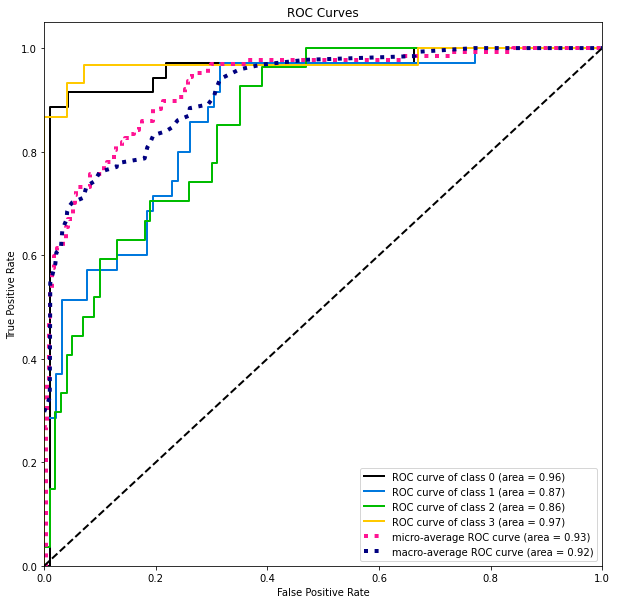

In [62]:
plt.figure(figsize=(10, 10))
scikitplot.metrics.plot_roc(y_test, y_predicted_test, ax=plt.gca())

__Not that good, yeah? Let's get back and make it really work__

### More complex stuff: NotMNIST

In [64]:
from notmnist import load_notmnist


X_train, y_train, X_test, y_test = load_notmnist()
X_train, X_test = X_train.reshape([-1, 784]), X_test.reshape([-1, 784])

print("Train size = %i, test_size = %i" % (len(X_train), len(X_test)))

ModuleNotFoundError: No module named 'notmnist'

In [ ]:
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(X_train[i].reshape([28, 28]))
    plt.title(str(y_train[i]))

In [ ]:
# Your turn: create a multiclass classifier in here for notMNIST dataset.

In [ ]:
# create a network that stacks layers on top of each other
model = nn.Sequential()

# add first "dense" layer with 784 input units and 1 output unit.
model.add_module(
    "l1",
)  # YOUR CODE HERE)
model.add_module(
    "a1",
)  # YOUR CODE HERE)

Take a look at the model structure:

In [ ]:
torchsummary.summary(model)

Let's check that everything works correctly:

In [ ]:
# create dummy data with 3 samples and 784 features
x = torch.tensor(X_train[:3], dtype=torch.float32)
y = torch.tensor(y_train[:3], dtype=torch.float32)

# compute outputs given inputs, both are variables
y_predicted = model(x)[:, 0]

y_predicted  # display what we've got

Let's call the loss function from `torch.nn`.

In [ ]:
loss_function = nn.CrossEntropyLoss()

Define some optimizer for your model parameters:

In [ ]:
opt = None  # YOUR CODE HERE

Compute the loss for some batch of objects:

In [ ]:
loss = None  # YOUR CODE HERE

Do a backward pass and optimizator step:

In [ ]:
# YOUR CODE HERE

Finally, implement the optimization pipeline and monitor the model quality during the optimization.

In [ ]:
# YOUR CODE HERE